<a href="https://colab.research.google.com/github/rushi2012/Plural_site_video_-Assessment/blob/main/plural_site_video_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import all Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Import CSV file
df = pd.read_csv('/content/PAE_Home-Assignment_Data.csv') 
df.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,"1,261",1.0,3/12/2018,18.0,"2,373","2,563","173,376",1.0,0.0,6.0,5.0
1,"1,261",2.0,3/13/2018,15.0,"2,453","2,765","115,584",1.0,0.0,1.0,5.0
2,"1,261",3.0,3/14/2018,22.0,3296,"4,627","86,688",1.0,0.0,2.0,5.0
3,"1,261",4.0,3/15/2018,45.0,"6,337","7,121","173,376",1.0,0.0,2.0,3.0
4,"1,261",5.0,3/16/2018,27.0,"4,393","4,968","260,064",1.0,0.0,4.0,0.0


In [5]:
#Check the shape 
df.shape

(13754, 11)

In [6]:
# Check for nun values
df.isnull().sum()

acct_id                   110
visit_num                 110
visit_dt                  110
clip_views                110
view_time_sec             110
total_clip_length_sec     110
total_course_lngth_sec    110
courses_viewed            110
b2b_visit_indicator       110
page_views                110
searches                  110
dtype: int64

In [8]:
#Drop null values
df = df.dropna()
df.tail()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
13639,"1,750",3.0,4/29/2018,33.0,"4,683","4,773","104,985",1.0,0.0,5.0,6.0
13640,"1,750",4.0,4/30/2018,37.0,"4,275","5,036","115,948",2.0,0.0,8.0,4.0
13641,"1,980",1.0,4/27/2018,31.0,"2,928","3,130","202,608",1.0,0.0,3.0,4.0
13642,"1,700",1.0,4/30/2018,4.0,192,433,"37,906",3.0,0.0,8.0,8.0
13643,"1,915",1.0,4/30/2018,1.0,78,78,"12,135",1.0,1.0,2.0,6.0


In [9]:
df.isnull().sum()

acct_id                   0
visit_num                 0
visit_dt                  0
clip_views                0
view_time_sec             0
total_clip_length_sec     0
total_course_lngth_sec    0
courses_viewed            0
b2b_visit_indicator       0
page_views                0
searches                  0
dtype: int64

In [10]:
#Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13644 entries, 0 to 13643
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   acct_id                 13644 non-null  object 
 1   visit_num               13644 non-null  float64
 2   visit_dt                13644 non-null  object 
 3   clip_views              13644 non-null  float64
 4   view_time_sec           13644 non-null  object 
 5   total_clip_length_sec   13644 non-null  object 
 6   total_course_lngth_sec  13644 non-null  object 
 7   courses_viewed          13644 non-null  float64
 8   b2b_visit_indicator     13644 non-null  float64
 9   page_views              13644 non-null  float64
 10  searches                13644 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [11]:
#Convert date into datetime
df['visit_dt'] = pd.to_datetime(df['visit_dt'])

In [13]:
# Remove ',',''
df['acct_id']=df['acct_id'].str.replace(',','')
df['view_time_sec']=df['view_time_sec'].str.replace(',','')
df['total_clip_length_sec']=df['total_clip_length_sec'].str.replace(',','')
df['total_course_lngth_sec']=df['total_course_lngth_sec'].str.replace(',','')
df.head()

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,1261,1.0,2018-03-12,18.0,2373,2563,173376,1.0,0.0,6.0,5.0
1,1261,2.0,2018-03-13,15.0,2453,2765,115584,1.0,0.0,1.0,5.0
2,1261,3.0,2018-03-14,22.0,3296,4627,86688,1.0,0.0,2.0,5.0
3,1261,4.0,2018-03-15,45.0,6337,7121,173376,1.0,0.0,2.0,3.0
4,1261,5.0,2018-03-16,27.0,4393,4968,260064,1.0,0.0,4.0,0.0


In [14]:
# Change datatype from object to int
df['view_time_sec'] = df['view_time_sec'].astype(str).astype(int)
df['acct_id'] = df['acct_id'].astype(str).astype(int)
df['total_clip_length_sec'] = df['total_clip_length_sec'].astype(str).astype(int)
df['total_course_lngth_sec'] = df['total_course_lngth_sec'].astype(str).astype(int)


In [15]:
# Check datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13644 entries, 0 to 13643
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   acct_id                 13644 non-null  int64         
 1   visit_num               13644 non-null  float64       
 2   visit_dt                13644 non-null  datetime64[ns]
 3   clip_views              13644 non-null  float64       
 4   view_time_sec           13644 non-null  int64         
 5   total_clip_length_sec   13644 non-null  int64         
 6   total_course_lngth_sec  13644 non-null  int64         
 7   courses_viewed          13644 non-null  float64       
 8   b2b_visit_indicator     13644 non-null  float64       
 9   page_views              13644 non-null  float64       
 10  searches                13644 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 1.2 MB


In [33]:
#Describe Dataframe
df.describe()

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
count,13644.000000,13644.000000,13644.000000,13644.000000,13644.000000,1.364400e+04,13644.000000,13644.000000,13644.000000,13644.000000
mean,1716.179420,21.128042,21.432498,4026.209469,5324.848798,2.505053e+05,1.483949,0.516931,4.298373,1.888156
std,286.854475,23.935015,24.241938,3848.833272,5976.236783,4.109100e+05,1.103707,0.499732,3.178949,2.442407
min,1200.000000,1.000000,1.000000,12.000000,12.000000,1.000000e+03,1.000000,0.000000,1.000000,0.000000
25%,1456.000000,5.000000,6.000000,1205.000000,1519.000000,4.450775e+04,1.000000,0.000000,2.000000,0.000000
50%,1716.000000,12.000000,15.000000,2974.500000,3819.000000,1.228560e+05,1.000000,1.000000,3.000000,1.000000
75%,1971.000000,29.000000,31.000000,5702.250000,7390.500000,2.955072e+05,2.000000,1.000000,6.000000,3.000000
max,2200.000000,153.000000,910.000000,40086.000000,208513.000000,1.206972e+07,22.000000,1.000000,19.000000,14.000000


The maximum number of pages viewed during single visit is 19.

The Maxmimum number of searches per visit is 14.

The maximum visit 153.
The maximum Video clips that viewed during visit is 910.
The maximum time one spend to view clip is 40086 sec.



In [16]:
# Plot Correlation between columns
corr = df.corr()
corr

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
acct_id,1.000000,0.065199,0.026137,0.020952,0.031201,0.017187,0.038342,-0.025716,0.019877,-0.003704
visit_num,0.065199,1.000000,0.008153,0.037092,0.028804,0.033303,0.058021,-0.046653,0.043908,-0.406774
clip_views,0.026137,0.008153,1.000000,0.705664,0.876934,0.793913,0.408945,-0.131563,0.288489,0.158032
view_time_sec,0.020952,0.037092,0.705664,1.000000,0.825885,0.528140,0.304155,-0.146718,0.235759,0.118307
total_clip_length_sec,0.031201,0.028804,0.876934,0.825885,1.000000,0.696013,0.406547,-0.154794,0.276341,0.134474
total_course_lngth_sec,0.017187,0.033303,0.793913,0.528140,0.696013,1.000000,0.326050,-0.022489,0.221027,0.096951
courses_viewed,0.038342,0.058021,0.408945,0.304155,0.406547,0.326050,1.000000,-0.068611,0.625527,0.283584
b2b_visit_indicator,-0.025716,-0.046653,-0.131563,-0.146718,-0.154794,-0.022489,-0.068611,1.000000,-0.040391,0.009118
page_views,0.019877,0.043908,0.288489,0.235759,0.276341,0.221027,0.625527,-0.040391,1.000000,0.294901
searches,-0.003704,-0.406774,0.158032,0.118307,0.134474,0.096951,0.283584,0.009118,0.294901,1.000000


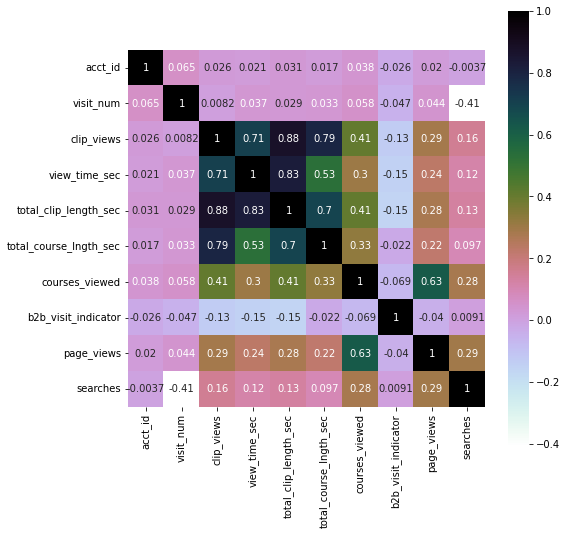

In [17]:
#Plot heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

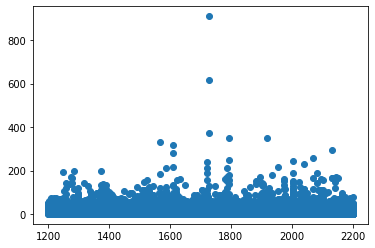

In [35]:
#Plot scatter plot between respective columns
data = df[['acct_id', 'clip_views' ]]
x = data['acct_id']
y = data['clip_views']
plt.scatter(x, y)

plt.show()

As you seen in the scatter plot all acct id are viewing an avg of 50 video clips.

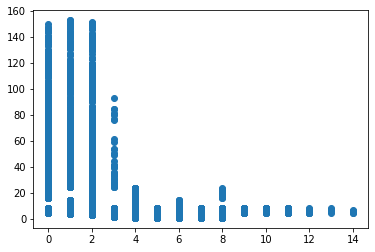

In [29]:
data = df[['visit_num','searches' ]]
y = data['visit_num']
x = data['searches' ]
plt.scatter(x, y)
plt.show()

Atleast 2 sites searches are viewed maximum time.

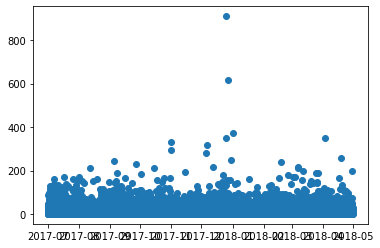

In [39]:
data = df[['visit_dt', 'clip_views' ]]
x = data['visit_dt']
y = data['clip_views']
plt.scatter(x, y)

plt.show()

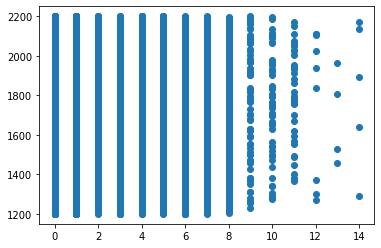

In [37]:
data = df[['acct_id', 'searches' ]]
y = data['acct_id']
x = data['searches']
plt.scatter(x, y)

plt.show()

As shown in the graph almost everyone searches atleast 8 sites during visit.

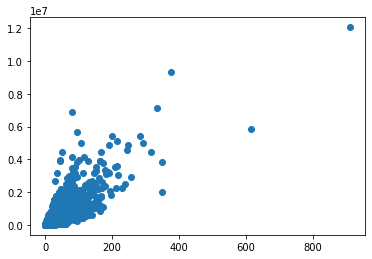

In [44]:
data = df[['total_course_lngth_sec', 'clip_views' ]]
y = data['total_course_lngth_sec']
x = data['clip_views']
plt.scatter(x, y)


plt.show()

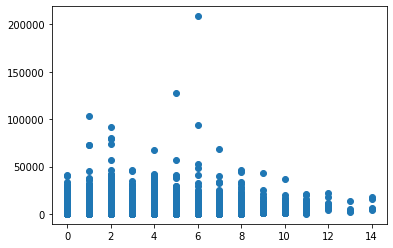

In [19]:
data = df[['total_clip_length_sec', 'searches' ]]
y = data['total_clip_length_sec']
x = data['searches']
plt.scatter(x, y)
plt.show()

The maximum searches of total clip length are between 0 to 50000 sec.